In [24]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import statistics as stat

In [76]:
def resistivity(Rabcd = 1, Rbcda = 1, f = 1):
    thickness = 2
    return (np.pi * thickness * (Rabcd + Rbcda)*f)/ np.log(2)

## Volatage at Reference Frequencies

Text(0, 0.5, 'Voltage ($\\mu$V)')

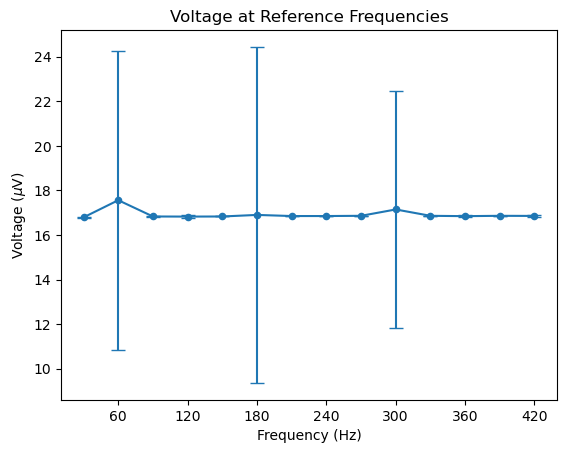

In [45]:
lockinDF = pd.read_csv("LockInAmp.csv")
lockinDF.columns = ['freq','min','max','avg']
std = np.zeros_like(lockinDF['avg'])
avg = np.zeros_like(lockinDF['avg'])
for row in range(len(lockinDF.index)):
    std[row] = stat.stdev([lockinDF.iloc[row]['min'], lockinDF.iloc[row]['max'] ])

lockinDF["stdDev"] = std
refPlot = lockinDF.plot.scatter(x = 'freq', y = 'avg', title = 'Voltage at Reference Frequencies')
plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
ax.xaxis.set_major_locator(plt.MultipleLocator(60))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage ($\mu$V)')


## Temperature Dependence

#### $Bi_2Sr_2CaCu_2O_8$

Text(0, 0.5, 'Voltage ($\\mu$V)')

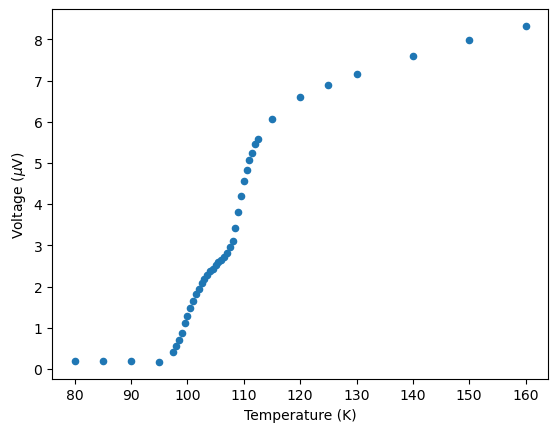

In [61]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
tempBSC.plot.scatter(x = 'temp', y = 'volt')

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
plt.xlabel('Temperature (K)')
plt.ylabel('Voltage ($\mu$V)')

Text(0, 0.5, 'Resistance (m$\\Omega$)')

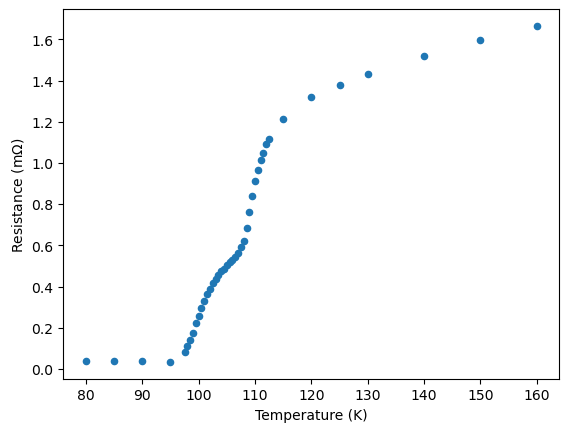

In [75]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
tempBSC.resistance = tempBSC.resistance * 1000
tempBSC.plot.scatter(x = 'temp', y = 'resistance')

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (m$\Omega$)')

In [ ]:
tempBSC = pd.read_csv('volt_temp_BSCCO.csv')
resistivity()
tempBSC.plot.scatter(x = 'temp', y = 'resistance')

#plt.errorbar(lockinDF['freq'],lockinDF['avg'], yerr=lockinDF['stdDev'], capsize = 5)


ax = plt.subplot()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (m$\Omega$)')

In [74]:
print(tempBSC)

      temp  vmin  vmax   volt      rmin      rmax  resistance
0    80.00  0.20  0.20  0.200  0.000040  0.000040       0.040
1    85.00  0.20  0.20  0.200  0.000040  0.000040       0.040
2    90.00  0.19  0.19  0.190  0.000038  0.000038       0.038
3    95.00  0.14  0.20  0.170  0.000028  0.000040       0.034
4    97.50  0.41  0.42  0.415  0.000082  0.000084       0.083
5    98.00  0.54  0.57  0.555  0.000108  0.000114       0.111
6    98.50  0.70  0.71  0.705  0.000140  0.000142       0.141
7    99.00  0.87  0.88  0.875  0.000174  0.000176       0.175
8    99.52  1.10  1.11  1.105  0.000220  0.000222       0.221
9   100.00  1.26  1.31  1.285  0.000252  0.000262       0.257
10  100.50  1.47  1.48  1.475  0.000294  0.000296       0.295
11  101.00  1.65  1.65  1.650  0.000330  0.000330       0.330
12  101.50  1.81  1.82  1.815  0.000362  0.000364       0.363
13  102.00  1.94  1.96  1.950  0.000388  0.000392       0.390
14  102.50  2.09  2.09  2.090  0.000418  0.000418       0.418
15  103.